In [32]:
!pip install easyocr
!pip install imutils

In [ ]:
import numpy as np
import easyocr
import imutils
import cv2
from matplotlib import pyplot as plt

In [ ]:
##This code is use for tack the live Images

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import cv2
import numpy as np
import PIL.Image
import io
import base64
import matplotlib.pyplot as plt

# Function to capture one photo from webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            // Setup video stream
            const video = document.createElement('video');
            video.style.display = 'block';
            div.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Wait for user to press capture
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            div.remove();

            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    img = PIL.Image.open(binary)
    img.save(filename)
    return filename

# --- Capture one image ---
print("📷 Please capture an image...")
filename = take_photo('photo.jpg')

# --- Read and process image ---
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


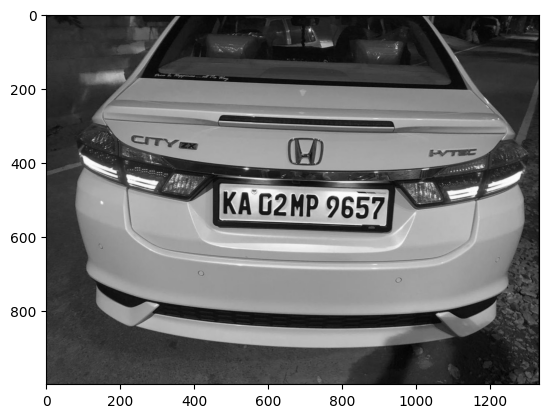

In [33]:
# This code is use for upload the Images from the files/folder
img=cv2.imread('car image1.jpeg') # This line of code is used to read an image file
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #It is use for coloer grade the image to gray
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

In [34]:
bfilter = cv2.bilateralFilter(gray,11,17,17) #This line applies a bilateral filter to the grayscale image gray
edged=cv2.Canny(bfilter,30,200) #This line applies the Canny edge detector to the filtered image
# plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

KeyPoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(KeyPoints)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]


location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10, True)
    if len(approx) == 4:
        location = approx
        break
# print(location)

if location is not None:
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

    (x,y) = np.where(mask==255)
    (x1,y1) = (np.min(x),np.min(y))
    (x2,y2) = (np.max(x),np.max(y))
    cropped_image = gray[x1:x2+1,y1:y2+1]

    # plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))


    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)

    if result:
        output = result[0][1]
        print(output.replace(" ", ""))
    else:
        print("No text found in the cropped image.")
else:
    print("No 4-sided contour found in the image.")

KAG2MP9657
